# EJERCICIO 8 (CAPÍTULO 8 EJERCICIO 11)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## (a)

In [93]:
caravan=pd.read_csv('data/Caravan.csv')

In [95]:
caravan.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [103]:
X_train=caravan.drop(['MKOOPKLA', 'ORIGIN'], axis=1).iloc[0:1000,:]
X_test=caravan.drop(['MKOOPKLA', 'ORIGIN'], axis=1).iloc[1000:9823,:]
y_train=caravan.loc[0:999,'MKOOPKLA']
y_test=caravan.loc[1000:9822,'MKOOPKLA']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1000, 85) (8822, 85) (1000,) (8822,)


## (b)

In [125]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98025226188414405

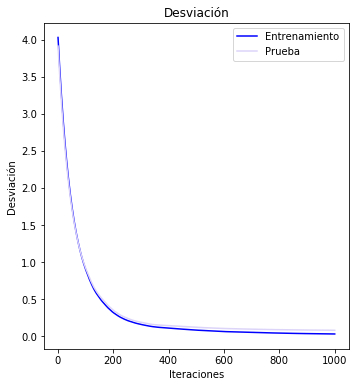

In [126]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Desviación')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Entrenamiento')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, '#dcd4f9',
         label='Prueba')
plt.legend(loc='upper right')
plt.xlabel('Iteraciones')
plt.ylabel('Desviación')
plt.show()

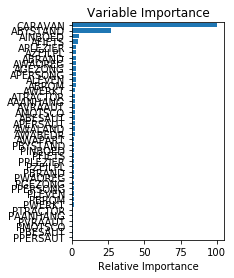

In [127]:
columnas=[]
for col in caravan.drop(['ORIGIN', 'MKOOPKLA'], axis=1).columns:
    columnas.append(col)
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, caravan.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.yticks(pos, columnas)
plt.title('Variable Importance')
plt.ylim((45, 85))
plt.show()

CARAVAN y ABYSTAND

## (c)

In [128]:
np.set_printoptions(suppress=True)
for x in range(len(clf.feature_importances_)):
    print(columnas[x], '{0:.10f}'.format(clf.feature_importances_[x]))

MOSTYPE 0.4893197430
MAANTHUI 0.0038338190
MGEMOMV 0.0005815127
MGEMLEEF 0.0067742834
MOSHOOFD 0.1309475066
MGODRK 0.0219206537
MGODPR 0.0122258530
MGODOV 0.0030906842
MGODGE 0.0151573396
MRELGE 0.0032623466
MRELSA 0.0043673479
MRELOV 0.0051097587
MFALLEEN 0.0063901848
MFGEKIND 0.0013927441
MFWEKIND 0.0145253491
MOPLHOOG 0.0101947364
MOPLMIDD 0.0086288567
MOPLLAAG 0.0026024222
MBERHOOG 0.0129683132
MBERZELF 0.0064832660
MBERBOER 0.0126997669
MBERMIDD 0.0030732613
MBERARBG 0.0090890158
MBERARBO 0.0080544658
MSKA 0.0063040892
MSKB1 0.0056843069
MSKB2 0.0053202481
MSKC 0.0114793635
MSKD 0.0121880403
MHHUUR 0.0134022224
MHKOOP 0.0101523681
MAUT1 0.0139572823
MAUT2 0.0234203057
MAUT0 0.0061217725
MZFONDS 0.0092760176
MZPART 0.0081918970
MINKM30 0.0115462221
MINK3045 0.0041241481
MINK4575 0.0118996765
MINK7512 0.0064664556
MINK123M 0.0053688315
MINKGEM 0.0119188345
PWAPART 0.0019359619
PWABEDR 0.0000026646
PWALAND 0.0000000000
PPERSAUT 0.0005499650
PBESAUT 0.0000000000
PMOTSCO 0.0030196055
P

## (c)

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(np.array(y_test), [int(x) for x in clf.predict(X_test)])

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  14,  800,   25,    0,    0,    0,    0,    0,    0],
       [   0,  297,  341,   19,    0,    0,    0,    0,    0],
       [   0,    0,  861, 1406,   13,    0,    0,    0,    0],
       [   0,    0,   13,  805,  555,   19,    0,    0,    0],
       [   0,    0,    1,   27,  788,   52,    3,    0,    0],
       [   0,    0,    0,    1,    3,  770,  660,    0,    0],
       [   0,    0,    0,    0,    0,   15,  448,  237,    0],
       [   0,    0,    0,    0,    0,    1,   30,  566,   52]])

In [131]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()

In [132]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [133]:
knn.score(X_test, y_test)

0.62672863296304693

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr=LogisticRegression()

In [136]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.51983677170709586

## Un Boosting es mucho más preciso para este escenario. Vecinos más cercanos no es mucho mejor que lanzar una moneda al aire y una regresión logística es prácticamente lanzar la moneda.